In [73]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn.metrics import roc_auc_score

In [46]:
traindf=pd.read_csv('train.csv')

In [47]:
testdf=pd.read_csv('test.csv')

In [4]:
traindf

,Breast Cancer,Age,Gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,1,88.0,0.0,0.379908,-3.883426,-0.531035,0.273928,0.415122,0.90469,0.026006,...,-0.748878,-1.139017,-0.898733,-1.28139,-0.414677,-1.173186,0.102473,0.333205,0.091267,1.056988
1,1,69.0,0.0,-0.327792,-4.097026,-0.531035,-0.153072,0.344622,0.34479,-0.178794,...,-0.748878,-1.587117,-0.017733,0.73891,0.739823,-1.037586,-0.739427,-1.289395,0.974667,0.048488
2,0,50.0,0.0,0.095408,3.298574,-0.531035,-0.193672,0.497022,0.35419,0.007006,...,1.515222,3.801283,-0.320933,-1.28139,0.561623,1.947814,1.288373,-0.092895,2.990667,-0.741812
3,1,40.0,0.0,-0.882292,0.677174,-0.531035,-0.614272,0.425222,0.19189,0.232006,...,-0.748878,1.766983,-0.091233,-1.28139,-0.023677,1.141814,0.716173,0.111605,2.118767,-0.589512
4,1,43.0,0.0,-1.116792,-5.043026,-0.531035,0.133628,0.727222,0.35889,0.869006,...,-0.748878,-1.587117,-2.481833,-0.76969,-0.264277,-2.093986,0.474173,-0.497595,-2.726433,-0.109712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,42.0,0.0,-0.403992,-3.738526,-0.531035,0.496628,0.503222,-0.33321,0.409106,...,-0.159778,8.944683,-0.003333,0.63461,0.390523,-1.558886,0.850373,-0.426995,0.994567,-0.420612
968,1,52.0,0.0,-0.628992,0.853574,-0.531035,0.097728,0.384222,0.27739,0.524706,...,0.911722,2.577283,-1.151833,-0.49859,0.571523,-0.514386,-0.867327,-0.258595,-0.035333,0.338688
969,1,44.0,0.0,0.768908,-0.804926,-0.531035,-0.546072,0.012122,-0.47181,0.229506,...,0.525722,2.891283,0.092867,-1.28139,0.058323,1.498514,2.359173,0.321905,2.061467,-0.238512
970,1,81.0,0.0,-1.291892,-3.987926,-0.531035,0.201828,-0.126978,0.02529,0.628606,...,-0.106678,-0.944917,-0.897633,-1.28139,-0.200577,0.135114,-0.103227,-0.168495,0.730267,-0.228712


In [5]:
testdf

,Breast Cancer,Age,Gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,1,80.0,0.0,-1.464692,-3.748626,-0.531035,0.213728,-0.375578,0.90809,1.307006,...,-0.453778,-1.047117,-0.902333,-1.28139,0.590923,-0.976986,0.638573,-0.224595,-1.678333,-0.930812
1,1,74.0,0.0,-1.053692,-4.593426,-0.531035,-0.293472,-0.497178,0.63079,-0.470994,...,-0.189678,3.693783,0.987667,-0.32009,0.803223,-1.576486,-0.323527,-1.082295,-0.078833,0.474288
2,1,67.0,0.0,-0.122992,-2.204726,-0.531035,0.481328,-0.318478,-0.39081,0.231406,...,0.841722,-1.222617,-0.134433,1.59101,0.742923,-1.224286,0.090673,-0.411195,0.597267,-0.162912
3,1,62.0,0.0,-1.271592,0.739174,-0.531035,0.050828,0.205222,-0.18381,-0.138594,...,-0.748878,2.949283,-0.598433,-1.28139,-0.251677,-1.201586,0.147773,-0.274295,-1.054833,0.301688
4,1,61.0,0.0,0.217708,-3.825726,-0.531035,-0.373672,0.207922,-0.32331,0.279606,...,0.076222,0.443783,-2.083933,1.30741,0.500423,0.058014,-1.190427,-0.129695,-3.494633,0.148888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1,58.0,0.0,-0.957492,-4.696626,1.131965,0.183428,-0.227978,0.24019,0.671106,...,-0.748878,7.884783,-0.215533,-1.28139,0.396823,-2.144386,-0.152527,-0.373995,-0.003133,-0.687612
239,1,62.0,0.0,-0.895192,-1.296026,-0.531035,0.188928,0.165622,0.04549,0.206706,...,-0.350178,3.421583,0.319067,-1.28139,0.114823,0.333214,1.288073,-0.546695,2.154167,-0.020412
240,1,46.0,0.0,-0.457192,-3.881626,-0.531035,-0.246672,0.787922,0.15939,-0.598894,...,0.158522,1.332683,-0.407533,-1.28139,-0.151777,1.080514,0.984573,0.768005,2.862767,-0.304012
241,0,47.0,0.0,0.152508,2.577874,-0.531035,-0.125972,0.771822,0.54879,-0.209894,...,1.446022,4.029283,0.228667,-1.28139,0.609623,2.253214,1.719673,0.194605,3.528867,-0.168712


### Use gene expression as the features, and the binary trait 'breast cancer' as the target.

In [48]:
#drop the target array (and the two other columns that are not gene expression data)
trainfeatures_matrix = traindf.drop(["Breast Cancer","Age","Gender"], axis = 1)
trainfeatures_matrix

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,0.379908,-3.883426,-0.531035,0.273928,0.415122,0.90469,0.026006,-0.302246,0.024701,0.013428,...,-0.748878,-1.139017,-0.898733,-1.28139,-0.414677,-1.173186,0.102473,0.333205,0.091267,1.056988
1,-0.327792,-4.097026,-0.531035,-0.153072,0.344622,0.34479,-0.178794,-1.838546,-0.423399,-0.307072,...,-0.748878,-1.587117,-0.017733,0.73891,0.739823,-1.037586,-0.739427,-1.289395,0.974667,0.048488
2,0.095408,3.298574,-0.531035,-0.193672,0.497022,0.35419,0.007006,0.914554,0.284901,-1.103072,...,1.515222,3.801283,-0.320933,-1.28139,0.561623,1.947814,1.288373,-0.092895,2.990667,-0.741812
3,-0.882292,0.677174,-0.531035,-0.614272,0.425222,0.19189,0.232006,0.596854,-0.423399,0.304528,...,-0.748878,1.766983,-0.091233,-1.28139,-0.023677,1.141814,0.716173,0.111605,2.118767,-0.589512
4,-1.116792,-5.043026,-0.531035,0.133628,0.727222,0.35889,0.869006,-0.571146,-0.423399,1.114228,...,-0.748878,-1.587117,-2.481833,-0.76969,-0.264277,-2.093986,0.474173,-0.497595,-2.726433,-0.109712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-0.403992,-3.738526,-0.531035,0.496628,0.503222,-0.33321,0.409106,-0.966146,-0.423399,-0.028372,...,-0.159778,8.944683,-0.003333,0.63461,0.390523,-1.558886,0.850373,-0.426995,0.994567,-0.420612
968,-0.628992,0.853574,-0.531035,0.097728,0.384222,0.27739,0.524706,-1.358846,0.633701,-0.614872,...,0.911722,2.577283,-1.151833,-0.49859,0.571523,-0.514386,-0.867327,-0.258595,-0.035333,0.338688
969,0.768908,-0.804926,-0.531035,-0.546072,0.012122,-0.47181,0.229506,-0.034346,0.014801,0.804028,...,0.525722,2.891283,0.092867,-1.28139,0.058323,1.498514,2.359173,0.321905,2.061467,-0.238512
970,-1.291892,-3.987926,-0.531035,0.201828,-0.126978,0.02529,0.628606,-0.865946,-0.423399,-1.085272,...,-0.106678,-0.944917,-0.897633,-1.28139,-0.200577,0.135114,-0.103227,-0.168495,0.730267,-0.228712


In [49]:
traintarget_array = traindf["Breast Cancer"]
traintarget_array

0      1
1      1
2      0
3      1
4      1
      ..
967    1
968    1
969    1
970    1
971    1
Name: Breast Cancer, Length: 972, dtype: int64

In [50]:
testfeatures_matrix = testdf.drop(["Breast Cancer","Age","Gender"], axis = 1)
testfeatures_matrix

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,-1.464692,-3.748626,-0.531035,0.213728,-0.375578,0.90809,1.307006,-1.065446,-0.423399,0.156328,...,-0.453778,-1.047117,-0.902333,-1.28139,0.590923,-0.976986,0.638573,-0.224595,-1.678333,-0.930812
1,-1.053692,-4.593426,-0.531035,-0.293472,-0.497178,0.63079,-0.470994,-1.162346,0.537901,-0.500472,...,-0.189678,3.693783,0.987667,-0.32009,0.803223,-1.576486,-0.323527,-1.082295,-0.078833,0.474288
2,-0.122992,-2.204726,-0.531035,0.481328,-0.318478,-0.39081,0.231406,-0.554346,-0.423399,-0.089572,...,0.841722,-1.222617,-0.134433,1.59101,0.742923,-1.224286,0.090673,-0.411195,0.597267,-0.162912
3,-1.271592,0.739174,-0.531035,0.050828,0.205222,-0.18381,-0.138594,-0.174446,-0.091999,-0.647872,...,-0.748878,2.949283,-0.598433,-1.28139,-0.251677,-1.201586,0.147773,-0.274295,-1.054833,0.301688
4,0.217708,-3.825726,-0.531035,-0.373672,0.207922,-0.32331,0.279606,3.720054,0.686001,0.514428,...,0.076222,0.443783,-2.083933,1.30741,0.500423,0.058014,-1.190427,-0.129695,-3.494633,0.148888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-0.957492,-4.696626,1.131965,0.183428,-0.227978,0.24019,0.671106,-0.455146,-0.077499,-1.027972,...,-0.748878,7.884783,-0.215533,-1.28139,0.396823,-2.144386,-0.152527,-0.373995,-0.003133,-0.687612
239,-0.895192,-1.296026,-0.531035,0.188928,0.165622,0.04549,0.206706,0.731654,0.287301,-1.369672,...,-0.350178,3.421583,0.319067,-1.28139,0.114823,0.333214,1.288073,-0.546695,2.154167,-0.020412
240,-0.457192,-3.881626,-0.531035,-0.246672,0.787922,0.15939,-0.598894,0.281454,-0.423399,0.515528,...,0.158522,1.332683,-0.407533,-1.28139,-0.151777,1.080514,0.984573,0.768005,2.862767,-0.304012
241,0.152508,2.577874,-0.531035,-0.125972,0.771822,0.54879,-0.209894,1.260554,0.172301,-0.086272,...,1.446022,4.029283,0.228667,-1.28139,0.609623,2.253214,1.719673,0.194605,3.528867,-0.168712


In [51]:
testtarget_array = testdf["Breast Cancer"]
testtarget_array

0      1
1      1
2      1
3      1
4      1
      ..
238    1
239    1
240    1
241    0
242    0
Name: Breast Cancer, Length: 243, dtype: int64

#### (Required for those registered for >=2 hours) Normalization is a technique widely used in machine learning. Please normalize the data in a manner you deem beneficial and report the results.

mean and std before standard scale

In [52]:
trainfeatures_matrix.mean()

ARHGEF10L   -0.187491
HIF3A       -2.202423
RNF17       -0.244602
RNF10        0.077484
RNF11        0.163115
               ...   
PTRF         0.402529
BCL6B        0.623072
GSTK1       -0.029327
SELP         0.794444
SELS         0.004747
Length: 20530, dtype: float64

In [53]:
trainfeatures_matrix.std()

ARHGEF10L    0.688940
HIF3A        2.361910
RNF17        0.779432
RNF10        0.345506
RNF11        0.528512
               ...   
PTRF         1.114574
BCL6B        0.879210
GSTK1        0.645490
SELP         2.328270
SELS         0.550317
Length: 20530, dtype: float64

In [54]:
testfeatures_matrix.mean()

ARHGEF10L   -0.220146
HIF3A       -2.182686
RNF17       -0.297809
RNF10        0.078534
RNF11        0.176997
               ...   
PTRF         0.372723
BCL6B        0.685752
GSTK1       -0.015755
SELP         1.070911
SELS        -0.047263
Length: 20530, dtype: float64

In [55]:
testfeatures_matrix.std()

ARHGEF10L    0.653554
HIF3A        2.320987
RNF17        0.630670
RNF10        0.315049
RNF11        0.539895
               ...   
PTRF         1.139844
BCL6B        0.846533
GSTK1        0.610286
SELP         2.239111
SELS         0.522664
Length: 20530, dtype: float64

Standardizing a dataset involves scaling the dataset to have a mean of 0 and a standard deviation of 1.

Z-score scale each of the values in TRAINING features matrix using the corresponding TRAINING data column means and standard deviations.

In [56]:
scaler_training = StandardScaler()
scaled_explanatory_variables = scaler_training.fit_transform(trainfeatures_matrix)
features_matrix1=pd.DataFrame(scaled_explanatory_variables, columns=trainfeatures_matrix.columns)
features_matrix1

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,0.824007,-0.712080,-0.367679,0.568860,0.477069,2.007462,-0.103831,-0.310763,0.288589,-0.056343,...,-0.927944,-0.962312,-0.725336,-0.531259,-1.012844,-1.414465,-0.592426,0.561929,-0.302172,1.913048
1,-0.203753,-0.802562,-0.367679,-0.667644,0.343607,0.853680,-0.517354,-1.571354,-0.696108,-0.347758,...,-0.927944,-1.127521,0.263256,1.179920,1.227519,-1.292742,-1.550483,-1.953116,0.077446,0.079523
2,0.410841,2.330245,-0.367679,-0.785213,0.632112,0.873051,-0.142195,0.687667,0.860377,-1.071524,...,2.538927,0.859119,-0.076973,-0.531259,0.881713,1.387150,0.757094,-0.098530,0.943771,-1.357299
3,-1.009027,1.219809,-0.367679,-2.003183,0.496189,0.538601,0.312115,0.426982,-0.696108,0.208341,...,-0.927944,0.109097,0.180779,-0.531259,-0.254090,0.663631,0.105947,0.218447,0.569094,-1.080407
4,-1.349580,-1.203292,-0.367679,0.162580,1.067898,0.882736,1.598318,-0.531405,-0.696108,0.944563,...,-0.927944,-1.127521,-2.501772,-0.097853,-0.720986,-2.241036,-0.169442,-0.725819,-1.513008,-0.208096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-0.314414,-0.650700,-0.367679,1.213753,0.643849,-0.543469,0.669708,-0.855518,-0.696108,-0.094350,...,-0.025893,2.755431,0.279414,1.091579,0.549685,-1.760695,0.258663,-0.616388,0.085998,-0.773335
968,-0.641171,1.294533,-0.367679,0.058621,0.418573,0.714790,0.903123,-1.177742,1.626863,-0.627627,...,1.614826,0.407845,-1.009346,0.131767,0.900925,-0.823083,-1.696030,-0.355367,-0.356576,0.607127
969,1.388933,0.591985,-0.367679,-1.805690,-0.285841,-0.829081,0.307068,-0.090941,0.266834,0.662513,...,1.023769,0.523613,0.387363,-0.531259,-0.094965,0.983828,1.975633,0.544413,0.544471,-0.442264
970,-1.603870,-0.756347,-0.367679,0.360073,-0.549168,0.195289,1.112913,-0.773300,-0.696108,-1.055339,...,0.055415,-0.890749,-0.724102,-0.531259,-0.597373,-0.240049,-0.826506,-0.215711,-0.027578,-0.424447


Z-score scale each of the values in TEST features matrix using the corresponding TRAINING data column means and standard deviations.

In [57]:
scaled_explanatory_variables2 = scaler_training.transform(testfeatures_matrix)
features_matrix2=pd.DataFrame(scaled_explanatory_variables2, columns=testfeatures_matrix.columns)
features_matrix2

,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,-1.854819,-0.654978,-0.367679,0.394533,-1.019787,2.014469,2.482709,-0.936997,-0.696108,0.073589,...,-0.476077,-0.928429,-0.729376,-0.531259,0.938571,-1.238343,0.017641,-0.302667,-1.062613,-1.700915
1,-1.257943,-1.012839,-0.367679,-1.074213,-1.249985,1.443039,-1.107352,-1.016507,1.416343,-0.523608,...,-0.071677,0.819485,1.391440,0.282955,1.350550,-1.776494,-1.077201,-1.632109,-0.375269,0.853658
2,0.093669,-0.000976,-0.367679,1.169447,-0.911692,-0.662165,0.310904,-0.517620,-0.696108,-0.149996,...,1.507639,-0.993134,0.132304,1.901642,1.233535,-1.460336,-0.605854,-0.591898,-0.084732,-0.304818
3,-1.574389,1.246073,-0.367679,-0.077192,0.079712,-0.235602,-0.436184,-0.205898,0.032142,-0.657632,...,-0.927944,0.544997,-0.388362,-0.531259,-0.696535,-1.439959,-0.540876,-0.379702,-0.794680,0.539858
4,0.588451,-0.687638,-0.367679,-1.306455,0.084823,-0.523068,0.408227,2.989684,1.741791,0.399193,...,0.335478,-0.378752,-2.055279,1.661435,0.762952,-0.309259,-2.063708,-0.155571,-1.843122,0.262057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-1.118236,-1.056555,1.767025,0.306790,-0.740369,0.638132,1.198727,-0.436223,0.064005,-1.003239,...,-0.927944,2.364659,0.041299,-0.531259,0.561911,-2.286278,-0.882608,-0.534238,-0.342738,-1.258760
239,-1.027761,0.383953,-0.367679,0.322717,0.004746,0.236915,0.261031,0.537590,0.865651,-1.313931,...,-0.317441,0.719128,0.641187,-0.531259,0.014676,-0.062222,0.756753,-0.801924,0.584307,-0.045742
240,-0.391674,-0.711318,-0.367679,-0.938690,1.182808,0.471628,-1.365602,0.168185,-0.696108,0.400193,...,0.461499,-0.051025,-0.174149,-0.531259,-0.502674,0.608604,0.411378,1.235872,0.888809,-0.561348
241,0.493764,2.024954,-0.367679,-0.589168,1.152330,1.274062,-0.580150,0.971573,0.612939,-0.146995,...,2.432965,0.943180,0.539747,-0.531259,0.974860,1.661297,1.247901,0.347097,1.175049,-0.315362


mean and z score after standard scale

In [58]:
features_matrix1.mean()

ARHGEF10L    9.137638e-18
HIF3A       -1.462022e-17
RNF17       -1.462022e-17
RNF10       -8.223874e-18
RNF11       -1.827528e-17
                 ...     
PTRF         4.386066e-17
BCL6B        1.169618e-16
GSTK1       -1.827528e-18
SELP        -9.137638e-18
SELS         1.462022e-17
Length: 20530, dtype: float64

In [59]:
features_matrix1.std()

ARHGEF10L    1.000515
HIF3A        1.000515
RNF17        1.000515
RNF10        1.000515
RNF11        1.000515
               ...   
PTRF         1.000515
BCL6B        1.000515
GSTK1        1.000515
SELP         1.000515
SELS         1.000515
Length: 20530, dtype: float64

In [60]:
features_matrix2.mean()

ARHGEF10L   -0.047423
HIF3A        0.008360
RNF17       -0.068299
RNF10        0.003040
RNF11        0.026281
               ...   
PTRF        -0.026756
BCL6B        0.071328
GSTK1        0.021037
SELP         0.118805
SELS        -0.094560
Length: 20530, dtype: float64

In [61]:
features_matrix2.std()

ARHGEF10L    0.949126
HIF3A        0.983180
RNF17        0.809557
RNF10        0.912317
RNF11        1.022063
               ...   
PTRF         1.023199
BCL6B        0.963329
GSTK1        0.945949
SELP         0.962201
SELS         0.950240
Length: 20530, dtype: float64

#### Model Selection: Apply Linear Regression, Ridge, and Lasso Regression models in sklearn to fit the training data, and tuning hyperparameters on the validation set to optimize the score. You may split a portion of the training set as the validation set, or conduct K-fold cross validation.

In [62]:
# because of the nature of the target array, we will use logistic regression instead of Linear Regression because it is a binary classification problem
log_mod= LogisticRegression(penalty="none",solver='newton-cg',max_iter=1000)

cross_val = KFold(n_splits = 5, shuffle = True, random_state = 207)
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [63]:
test_fold_predict_auc = cross_val_score(log_mod, features_matrix1, traintarget_array, cv = cross_val, scoring = 'roc_auc')
print('Test Fold auc Values:', test_fold_predict_auc)
print('Mean Test Fold auc :',test_fold_predict_auc.mean())
print('Std Test Fold auc :',test_fold_predict_auc.std())

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\a

Test Fold auc Values: [0.99940191 0.99457143 0.99532512 0.99699248 0.99962756]
Mean Test Fold auc : 0.9971837002087056
Std Test Fold auc : 0.00205950406332577


In [64]:
log_mod = {}
results = []

for i in np.arange(0.01, 0.61, 0.01):
    log_mod[str(i)]= LogisticRegression(penalty="l1",solver='liblinear',max_iter=1000, C=1/i)
    test_fold_predict_aucL = cross_val_score(log_mod[str(i)], features_matrix1, traintarget_array, cv = cross_val, scoring = 'roc_auc')
    mean=test_fold_predict_aucL.mean()
    results.append([i, mean])
dfL=pd.DataFrame(results, columns=['lambda','mean'])
dfL

,lambda,mean
0,0.01,0.994195
1,0.02,0.996947
2,0.03,0.998946
3,0.04,0.999348
4,0.05,0.999167
5,0.06,0.999221
6,0.07,0.999107
7,0.08,0.999169
8,0.09,0.999052
9,0.10,0.999286


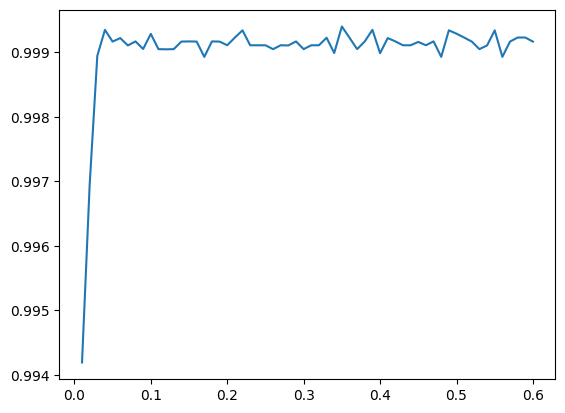

In [65]:
plt.plot(dfL['lambda'].values, dfL['mean'].values)

In [66]:
dfL_sorted = dfL.sort_values('mean', ascending=False)
dfL_sorted.head()

,lambda,mean
34,0.35,0.999401
38,0.39,0.999349
3,0.04,0.999348
48,0.49,0.999341
21,0.22,0.999341


In [67]:
ridge_mod = {}
results = []

for i in np.arange(1, 101, 10):
    ridge_mod[str(i)]= LogisticRegression(penalty="l2",solver='liblinear',max_iter=1000, C=1/i)
    test_fold_predict_aucR = cross_val_score(ridge_mod[str(i)], features_matrix1, traintarget_array, cv = cross_val, scoring = 'roc_auc')
    mean=test_fold_predict_aucR.mean()
    results.append([i, mean])
dfR=pd.DataFrame(results, columns=['lambda','mean'])
dfR

,lambda,mean
0,1,0.997493
1,11,0.997724
2,21,0.997724
3,31,0.997724
4,41,0.997809
5,51,0.997809
6,61,0.997809
7,71,0.997809
8,81,0.997809
9,91,0.997809


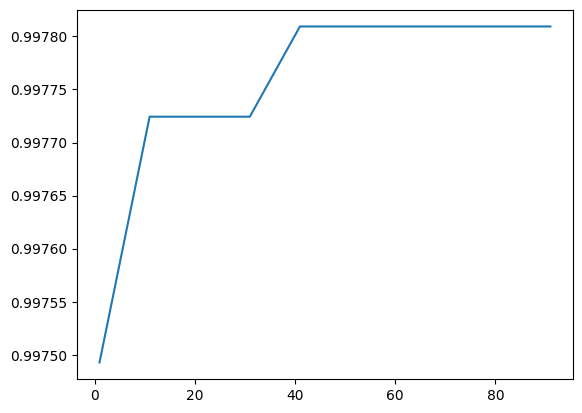

In [68]:
plt.plot(dfR['lambda'].values, dfR['mean'].values)

In [69]:
dfR_sorted = dfR.sort_values('mean', ascending=False)
dfR_sorted

,lambda,mean
4,41,0.997809
5,51,0.997809
6,61,0.997809
7,71,0.997809
8,81,0.997809
9,91,0.997809
1,11,0.997724
2,21,0.997724
3,31,0.997724
0,1,0.997493


#### Model Testing: Select the best-performing model, and report its performance in predicting the traits on the test set.

In [70]:
print("Lambda for the best model is: ", dfL_sorted.iloc[0,0], " and mean auc is: ", dfL_sorted.iloc[0,1])

Lambda for the best model is:  0.35000000000000003  and mean auc is:  0.9994008885850991


the best model that yields the best predicition would be lasso logistic model with lambda 0.035 resulting an AUC of 0.9994008885850991

In [86]:
best_mod= LogisticRegression(penalty="l1",solver='liblinear',max_iter=1000, C=1/0.35000000000000003)
best_mod.fit(features_matrix1, traintarget_array)

LogisticRegression(C=2.8571428571428568, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [87]:
# Fit the model to your data
prediction=best_mod.predict(features_matrix2) 
auc_score = roc_auc_score(testtarget_array, prediction)
print('Test AUC Score:', auc_score)

Test AUC Score: 0.9814814814814815


we get 0.9814814814814815 auc score for our test dataset

In [88]:
slopes=pd.DataFrame(best_mod.coef_.T, columns=['Lasso'], index=features_matrix1.columns)
print("intercept: ", best_mod.intercept_)
print('Model Slopes')
slopes

intercept:  [6.53284165]
Model Slopes


,Lasso
ARHGEF10L,0.0
HIF3A,0.0
RNF17,0.0
RNF10,0.0
RNF11,0.0
...,...
PTRF,0.0
BCL6B,0.0
GSTK1,0.0
SELP,0.0


In [89]:
non0= slopes[np.abs(slopes['Lasso'])>0.0000001].index
non0

Index(['SNORD115-13', 'MGRN1', 'TLN2', 'NR1D1', 'C16orf75', 'LOC729467',
       'LOC121838', 'C3orf50', 'C15orf43', 'NUAK2',
       ...
       'CST2', '?|728788', 'SLC13A1', 'BGN', 'LOC285205', 'DNAH14', 'RYR3',
       'EDN2', 'FOXD4', 'SLC7A14'],
      dtype='object', length=180)

In [90]:
len(non0)

180

In [91]:
non0slopes = slopes[slopes.index.isin(non0)]
print("intercept: ", best_mod.intercept_)
print('Model Slopes')
non0slopes

intercept:  [6.53284165]
Model Slopes


,Lasso
SNORD115-13,0.086612
MGRN1,0.001455
TLN2,-0.037760
NR1D1,-0.075602
C16orf75,0.048737
...,...
DNAH14,0.019386
RYR3,-0.142749
EDN2,0.088566
FOXD4,0.025197


In [92]:
non0slopes['abs_Lasso'] = non0slopes['Lasso'].abs()
non0slopes_sorted = non0slopes.sort_values('abs_Lasso', ascending=False)
non0slopes_sorted.drop('abs_Lasso', axis=1, inplace=True)
non0slopes_sorted

C:\Users\arthu\AppData\Local\Temp\ipykernel_21940\2312486089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non0slopes['abs_Lasso'] = non0slopes['Lasso'].abs()


,Lasso
OR2L3,-0.284117
MFAP5,-0.262931
CLEC5A,0.246502
GLRA4,-0.242578
COMP,0.220144
...,...
C11orf53,-0.001179
LOC646982,-0.001144
GPAM,-0.000688
PRKG2,-0.000455


In [93]:
remaining=features_matrix1[non0]
remaining.corr()

,SNORD115-13,MGRN1,TLN2,NR1D1,C16orf75,LOC729467,LOC121838,C3orf50,C15orf43,NUAK2,...,CST2,?|728788,SLC13A1,BGN,LOC285205,DNAH14,RYR3,EDN2,FOXD4,SLC7A14
SNORD115-13,1.000000,0.036809,0.033417,0.037076,-0.009535,-0.004591,-0.027536,0.010456,0.031637,0.045580,...,0.064964,0.009190,0.008837,-0.001795,-0.034719,0.059036,-0.000368,0.037931,0.028357,0.006520
MGRN1,0.036809,1.000000,-0.143370,0.039157,0.280519,-0.273494,-0.237891,-0.256015,-0.048719,0.286062,...,0.267635,-0.117593,-0.019663,0.303552,-0.242131,0.140748,-0.302106,0.106538,0.351269,-0.251074
TLN2,0.033417,-0.143370,1.000000,0.115520,-0.505111,0.419791,0.121839,0.483242,0.036483,-0.308896,...,-0.113545,0.209032,0.005803,-0.058171,0.243006,-0.348034,0.460583,-0.122617,-0.240412,0.327819
NR1D1,0.037076,0.039157,0.115520,1.000000,-0.165886,0.153323,-0.008796,0.185735,-0.042758,-0.054215,...,0.025782,0.118283,-0.018858,0.014541,0.018879,-0.151544,0.087822,-0.098576,0.007160,0.135314
C16orf75,-0.009535,0.280519,-0.505111,-0.165886,1.000000,-0.373195,-0.060086,-0.432896,-0.102589,0.337197,...,0.064243,-0.266172,-0.074641,0.248628,-0.249334,0.441229,-0.372475,0.256930,0.239002,-0.383544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DNAH14,0.059036,0.140748,-0.348034,-0.151544,0.441229,-0.471281,-0.007271,-0.397779,-0.107483,0.272795,...,0.164121,-0.045624,-0.007549,0.135296,-0.240031,1.000000,-0.222427,0.317306,0.189981,-0.238110
RYR3,-0.000368,-0.302106,0.460583,0.087822,-0.372475,0.411497,0.493641,0.446891,0.111170,-0.450840,...,-0.358051,0.294104,0.000642,-0.211117,0.451223,-0.222427,1.000000,-0.044082,-0.234403,0.581389
EDN2,0.037931,0.106538,-0.122617,-0.098576,0.256930,-0.249518,0.123665,-0.228929,-0.023308,0.104553,...,0.141903,-0.195267,-0.038784,0.400043,-0.080153,0.317306,-0.044082,1.000000,0.122879,-0.119980
FOXD4,0.028357,0.351269,-0.240412,0.007160,0.239002,-0.241256,-0.110906,-0.199321,-0.032593,0.266713,...,0.217576,-0.093145,-0.034208,0.147905,-0.180490,0.189981,-0.234403,0.122879,1.000000,-0.153138


In [94]:
# Calculate the correlation matrix
corr_matrix = remaining.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_mask = (corr_matrix.abs() > 0.7) & mask

# Create a DataFrame with pairs and correlation values
pairs = np.where(high_corr_mask)
high_corr_pairs = pd.DataFrame({'Pair': [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*pairs)],
                                'Correlation': [corr_matrix.iloc[x, y] for x, y in zip(*pairs)]})

print(high_corr_pairs)

                   Pair  Correlation
0       (C16orf75, TK1)     0.738197
1      (C16orf75, NEK2)     0.769774
2   (PPAPDC1A, COL10A1)     0.866799
3     (PPAPDC1A, MFAP2)     0.751258
4   (PPAPDC1A, C1QTNF6)     0.782582
..                  ...          ...
60      (CCRL1, OLFML1)     0.747052
61    (ADAMTS14, WISP1)     0.719120
62      (ADAMTS14, BGN)     0.740591
63         (WISP1, BGN)     0.748215
64         (CILP2, BGN)     0.720499

[65 rows x 2 columns]


We can see that the total of 180 gene expression is not zeroed out indicating it has enough predictive power and will not overfit the model.

We get 0.9814814814814815 auc score when predicting the traits from test dataset meaning the model performance is good enough for predicting the traits from test dataset 

Even though we have z score scaled the features matrix we still can't be confident about the interpretability of the slopes that this model yields because we can still detect many multicolinearity therefore we can't trust the slope interpretation